# Homework 2: Data tables

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. **Loading the Data (1 point)** 

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data. 

In [2]:
# INSERT CODE HERE
# If you are running this on your local computer, wet your workign directory to 
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer. 

setwd("~/Desktop/Stat and Data Psy/lexDat")

LexDat_clean <- read.csv("LexicalData_toclean.csv")

head(LexDat_clean)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. **Data Cleansing (4 points)**

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive. 

Write code that will copy the data to a new variable and make the above changes. 

In [3]:
# INSERT CODE HERE

## Get rid of commas in RT values:
LexDat_clean$D_RT <- gsub(",","", LexDat_clean$D_RT)
head(LexDat_clean)

## Make D_RT variable numeric: 
LexDat_clean$D_RT <- as.numeric(LexDat_clean$D_RT)
head(LexDat_clean)

## Remove rows where RTs are missinig: 
library(tidyverse)
LexDat_clean %>% filter(D_RT !="n/a") -> LexDat_clean2

## Count # of NAs within the D_RT variable
summarize(LexDat_clean2, n_NA = sum(is.na(D_RT)))

## Make sure all RTs are positive
summary(LexDat_clean2$D_RT)
## The minimum value for RT is 3.0, which is positive; thus all RTs are positive. 

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,1094,refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,1094,refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



n_NA
<int>
0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0   579.0   699.0   807.3   907.0  3994.0 

For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing. 

> *Write your response here.*

> * First action: Removing commas in reaction time values addresses a syntactic anomaly - specifically avoiding domain format errors. The RT domain does not include commas, for example some RTs are in the hundreds, tens, or ones places where commas are not used. Thus, removing all commas for values that have them allow the RT values to be uniform on their formatting. 

> * Second action: Removing rows where RTs are missing addresses a coverage anomaly - specifically avoiding missing values. 

> * Third action: Ensuring that there are no negative reaction time values addresses a semantic anomaly - specifically, integrity constraints. RT cannot be below 0 (theoretically), which places a constraint on what range of values is permissible for this variable. 

---
## 3. **Data Manipulation with Tidyverse (4 points)**

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells. 

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [4]:
# INSERT CODE HERE
LexDat_summary <- LexDat_clean2 %>% 
    summarise(n_obs = length(D_RT), # essentially, how many observations with RTs are there total? Given that we eliminated rows with RT NAs, counting rows with NAs will let me know how many observations there are
              mean_RT = mean(D_RT), # mean RT
              sd_RT = sd(D_RT), # RT standard deviation
              median_RT = median(D_RT)) # median RT

LexDat_summary
              
## There are 62,607 observations with RTs; 
## The mean RT is 807.3 units (likely ms)
## The median RT is 699 ms (lower than the mean value)
## The standard deviation of RT is 377.4 ms. 


n_obs,mean_RT,sd_RT,median_RT
<int>,<dbl>,<dbl>,<dbl>
62607,807.2667,377.4396,699


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one. 

In [5]:
# INSERT CODE HERE

LexDat_clean3 <- LexDat_clean2 %>% mutate(new_Trial = Trial - 1) # New variable is named new_Trial for now. Using the Trial variable and subtracting 1 to make it so that trial starts at 0 and increments as it should from there!
head(LexDat_clean3) # Checking to make sure that the new_Trial variable begins at 0 and increments as expected
max(LexDat_clean3$Trial) # The max trial number is equal to 500; given the new coding this means the new_Trial max value should be equal to 500 - 1 = 499
max(LexDat_clean3$new_Trial) # This checks out!

select(LexDat_clean3, -Trial) %>% head() # To reduce confusion, I am removing the original Trial variable; if I need it, it exists in prior forms of the data frame (e.g. LexDat_clean2 and _clean1)






,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,new_Trial
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,0
2,67,1,1,1094,refrigerant,false,0.825,0
3,120,1,1,587,gaining,false,-0.645,0
4,21,1,1,984,cheerless,false,0.025,0
5,236,1,1,577,pattered,false,-0.763,0
6,236,2,1,715,conjures,false,-0.364,1


[1] 500

[1] 499

,Sub_ID,Type,D_RT,D_Word,Outlier,D_Zscore,new_Trial
,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,710,browse,false,-0.437,0
2,67,1,1094,refrigerant,false,0.825,0
3,120,1,587,gaining,false,-0.645,0
4,21,1,984,cheerless,false,0.025,0
5,236,1,577,pattered,false,-0.763,0
6,236,1,715,conjures,false,-0.364,1


---
## 4. **Plotting Data (1 point)**

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

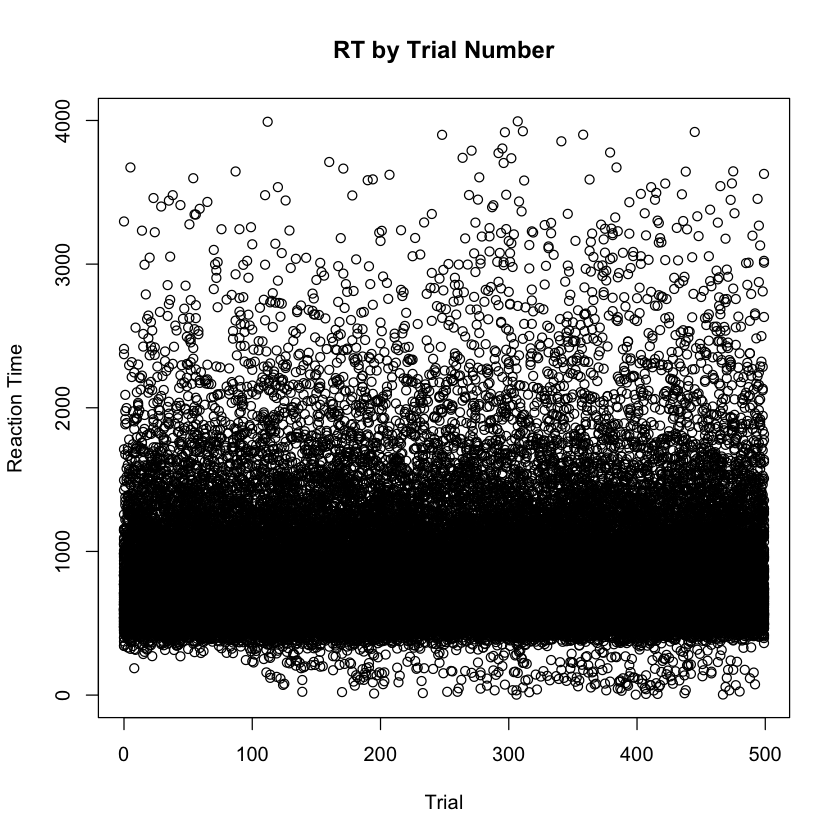

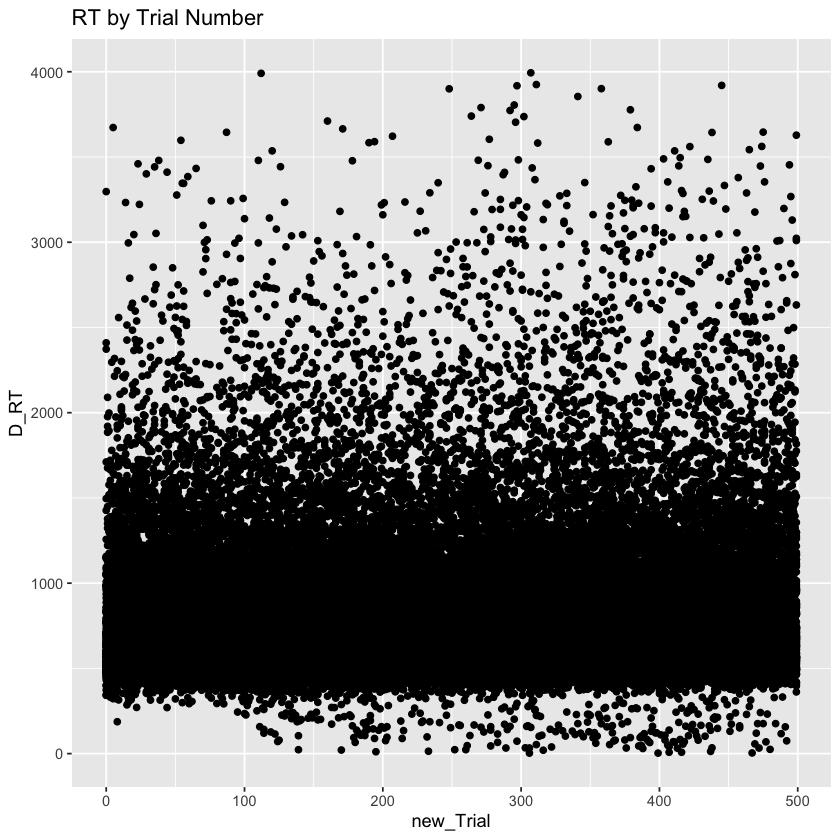

In [6]:
# INSERT CODE HERE

plot(LexDat_clean3$new_Trial, LexDat_clean3$D_RT, xlab="Trial", ylab="Reaction Time", main="RT by Trial Number")

## For practice, in ggplot: 
ggplot(LexDat_clean3, aes(x=new_Trial, y=D_RT)) + geom_point() + ggtitle("RT by Trial Number")

## This plot is tough to interpret, there is bunching of majority of the RT values ranting from about 250ms to 2000 ms that makes it difficult to decipher, resulting in so much overlap of datapoints that the graph is black. Overall however there does not appear to be a relationship between RT and Trial. If I were to draw a line to fit these data it would be parallel to the x-axis. 



That's all for Homework 2! When you are finished, save the notebook as Homework2.ipynb, push it to your class GitHub repository (the one you made for Homework 1) and send the instructors a link to your notebook via Canvas. You can send messages via Canvas by clicking "Inbox" on the left and then pressing the icon with a pencil inside a square.

**DUE:** 5pm EST, Feb 14, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Monique Tardif and I met and worked through the 1st 2 problems together to get the journey started!